# Brain Stroke Prediction Model

Authored by:
### Team Name: Team Apogee
### Team Members: Nikhil Sai Kumar Vuppalavanchu, Ankit Patro, Shanmukha Rana Pratap Chowdary Ponnaganti, Nikhil Buggineni, Yaswantika Chilukuri


## Business Model and Purpose

We are trying to predict the occurance of a Brain Stroke while taking into consideration factors such as Gender, Age, Hypertension, histoery of heart disease, marital status, work type, residence type, average glucose level, body mass index and if a person smokes or not.

This data set was downloaded from Kaggle. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv("brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.columns=[col.strip().replace('-','_') for col in df.columns]
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

The necessary data set was imported into the Python environment. It is then analized, cleaned and restructured to best fit the purpose of  creating a prediction models.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
encoder = LabelEncoder()
df.gender = encoder.fit_transform(df.gender)
df.gender
df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,1,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,0,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,0,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,0,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,0,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


The target variable is converted into Catagorrical variables using Label Encoders.

In [7]:
df.ever_married.unique()
X= df.iloc[:,:-1]
y= df.iloc[:,-1]
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [8]:
X.columns
X.dtypes
cat = [col for col in X.columns if X[col].dtype == 'object']
cat

['ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [9]:
X= pd.get_dummies(X,columns=cat)


The input variables which are in catagorical format are converted into catagorical data types using dummy variables. The attempt to use Ordinal Encoder caused errors but using Dummy variables did not have the same issue.

In [10]:
X['stroke']=df.stroke
X.corr()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
gender,1.000000,-0.026538,0.021485,0.086476,0.055796,-0.012093,0.028971,-0.028971,-0.017176,-0.028706,-0.029635,0.090275,0.004301,-0.004301,0.059858,0.045109,-0.102387,0.013349,0.008870
age,-0.026538,1.000000,0.278120,0.264852,0.236763,0.373703,-0.677137,0.677137,0.126868,0.111020,0.326835,-0.636866,-0.017155,0.017155,-0.379669,0.235508,0.122617,0.070899,0.246478
hypertension,0.021485,0.278120,1.000000,0.111974,0.170028,0.158762,-0.164534,0.164534,0.016378,-0.004177,0.110468,-0.128924,0.004755,-0.004755,-0.139901,0.056797,0.065267,0.030749,0.131965
heart_disease,0.086476,0.264852,0.111974,1.000000,0.166847,0.060926,-0.114765,0.114765,0.001166,-0.001600,0.087474,-0.092974,-0.002125,0.002125,-0.066710,0.067541,-0.022727,0.044011,0.134610
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,1.000000,0.186348,-0.150724,0.150724,0.009223,0.020764,0.058419,-0.101960,-0.001346,0.001346,-0.095504,0.066989,0.024727,0.017873,0.133227
bmi,-0.012093,0.373703,0.158762,0.060926,0.186348,1.000000,-0.371690,0.371690,0.087375,0.211820,0.085582,-0.484257,-0.013185,0.013185,-0.293912,0.120156,0.109322,0.100710,0.056926
ever_married_No,0.028971,-0.677137,-0.164534,-0.114765,-0.150724,-0.371690,1.000000,-1.000000,-0.133655,-0.146139,-0.191668,0.548851,0.008191,-0.008191,0.335689,-0.172039,-0.104120,-0.106234,-0.108398
ever_married_Yes,-0.028971,0.677137,0.164534,0.114765,0.150724,0.371690,-1.000000,1.000000,0.133655,0.146139,0.191668,-0.548851,-0.008191,0.008191,-0.335689,0.172039,0.104120,0.106234,0.108398
work_type_Govt_job,-0.017176,0.126868,0.016378,0.001166,0.009223,0.087375,-0.133655,0.133655,1.000000,-0.447467,-0.169061,-0.152306,-0.013925,0.013925,-0.096437,0.029833,0.045091,0.030804,0.002574
work_type_Private,-0.028706,0.111020,-0.004177,-0.001600,0.020764,0.211820,-0.146139,0.146139,-0.447467,1.000000,-0.509458,-0.458968,0.016104,-0.016104,-0.210882,0.022685,0.109936,0.096769,0.010459


In [11]:
X.corr()['stroke']

gender                            0.008870
age                               0.246478
hypertension                      0.131965
heart_disease                     0.134610
avg_glucose_level                 0.133227
bmi                               0.056926
ever_married_No                  -0.108398
ever_married_Yes                  0.108398
work_type_Govt_job                0.002574
work_type_Private                 0.010459
work_type_Self-employed           0.062643
work_type_children               -0.085075
Residence_type_Rural             -0.016494
Residence_type_Urban              0.016494
smoking_status_Unknown           -0.055699
smoking_status_formerly smoked    0.065320
smoking_status_never smoked      -0.004806
smoking_status_smokes             0.008561
stroke                            1.000000
Name: stroke, dtype: float64

In [12]:
X=X.drop('stroke',axis=1)

In [13]:
X.head()
y.value_counts()
Y1=y
Y1

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64

In [14]:
X1=X
X1
oversample = RandomOverSampler(sampling_strategy='minority')

X2, y2 = oversample.fit_resample(X1, Y1)

The data imbalance was addressed using Random Oversampling. This was done as both KNN modeling as well as Decision Tree are sensitive to data imbalance.

In [15]:
train_X1, valid_X1, train_y1, valid_y1 = train_test_split(X2,y2, test_size=0.2, random_state=1)

Using SKLearn package, we have split the data into train and test data sets in the proportion of 80% and 20% respectively. This seemed like a reasonable split as this is standard practice while dealing with medium sized datasets.

In [16]:
y2.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.fit(train_X1,train_y1)

KNeighborsClassifier()

In [19]:
validation_predictions = knn.predict(valid_X1)

print('Confusion Matrix:\n ', confusion_matrix(valid_y1, validation_predictions))
print('Accuracy score:\n', accuracy_score(valid_y1, validation_predictions))
print('Precision score:\n', precision_score(valid_y1, validation_predictions))
print('Recall score:\n', recall_score(valid_y1, validation_predictions))
print('F1 Score:\n', f1_score(valid_y1, validation_predictions))


Confusion Matrix:
  [[818 140]
 [  0 936]]
Accuracy score:
 0.9260823653643083
Precision score:
 0.8698884758364313
Recall score:
 1.0
F1 Score:
 0.9304174950298212


KNN model predicted the correct output with the an accuracy of 92.6%. It had a precision of 86%, recall of 100 and F1 score of 0.93. Since this is a model to predict brain strokes, having FNs is a serious issue where as FPs are not a very huge deal. This would indicate that accuracy and recall are the best metrics to judge a good model.

From the above output, it is apparent that this is a very good model. Is this the best model for the given purpose remains to be seen.

In [20]:
dtree=DecisionTreeClassifier(random_state=1)

In [21]:
dtree.fit(train_X1, train_y1)

DecisionTreeClassifier(random_state=1)

In [22]:
validation_predictions = dtree.predict(valid_X1)

print('Confusion Matrix:\n ', confusion_matrix(valid_y1, validation_predictions))
print('Accuracy score:\n', accuracy_score(valid_y1, validation_predictions))
print('Precision score:\n', precision_score(valid_y1, validation_predictions))
print('Recall score:\n', recall_score(valid_y1, validation_predictions))
print('F1 Score:\n', f1_score(valid_y1, validation_predictions))
print(classification_report(valid_y1,validation_predictions))

Confusion Matrix:
  [[900  58]
 [  0 936]]
Accuracy score:
 0.9693769799366421
Precision score:
 0.9416498993963782
Recall score:
 1.0
F1 Score:
 0.9699481865284973
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       958
           1       0.94      1.00      0.97       936

    accuracy                           0.97      1894
   macro avg       0.97      0.97      0.97      1894
weighted avg       0.97      0.97      0.97      1894



The Decision Tree predicted the correct output with the an accuracy of 96.6%. It had a precision of 93%, recall of 100 and F1 score of 96.7. 

Since this is a model to predict brain strokes, having FNs is a serious issue where as FPs are not a very huge deal. This would indicate that accuracy and recall are the best metrics to judge a good model.

### From the above output, it is apparent that this is an even better model when compared to KNN moodel. We arrived at this conclusing as all the metrics that were generated were better for the decision tree that it was for KNN model. This might be due to the type of data that was asked to be analized. It has quite a few catagorical variables which are better suited to be analized using a decision tree. 

## Assignment-4

## Hyper Parameter Tuning for Decision Tree model

In [23]:
score_measure = 'precision'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1,max_leaf_nodes=None), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X1, train_y1)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionTree = gridSearch.best_estimator_

precision score:  0.9446073167607871
parameters:  {'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_split': 10}


In [24]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X1, train_y1)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestRecallTree = gridSearch.best_estimator_

recall score:  1.0
parameters:  {'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_split': 2}


In [25]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X1, train_y1)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyTree = gridSearch.best_estimator_

accuracy score:  0.9705503253712928
parameters:  {'max_depth': 30, 'min_impurity_decrease': 0, 'min_samples_split': 2}


In [26]:
print("*****************")
print("Best Accuracy Tree")
print(classification_report(valid_y1, bestAccuracyTree.predict(valid_X1)))
print("*****************")
print("Best Precision Tree")
print(classification_report(valid_y1, bestPrecisionTree.predict(valid_X1)))
print("*****************")
print("Best Recall Tree")
print(classification_report(valid_y1, bestRecallTree.predict(valid_X1)))

*****************
Best Accuracy Tree
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       958
           1       0.94      1.00      0.97       936

    accuracy                           0.97      1894
   macro avg       0.97      0.97      0.97      1894
weighted avg       0.97      0.97      0.97      1894

*****************
Best Precision Tree
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       958
           1       0.94      1.00      0.97       936

    accuracy                           0.97      1894
   macro avg       0.97      0.97      0.97      1894
weighted avg       0.97      0.97      0.97      1894

*****************
Best Recall Tree
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       958
           1       0.94      1.00      0.97       936

    accuracy                           0.97      1894
   macro avg      

## Visualising the Decision tree

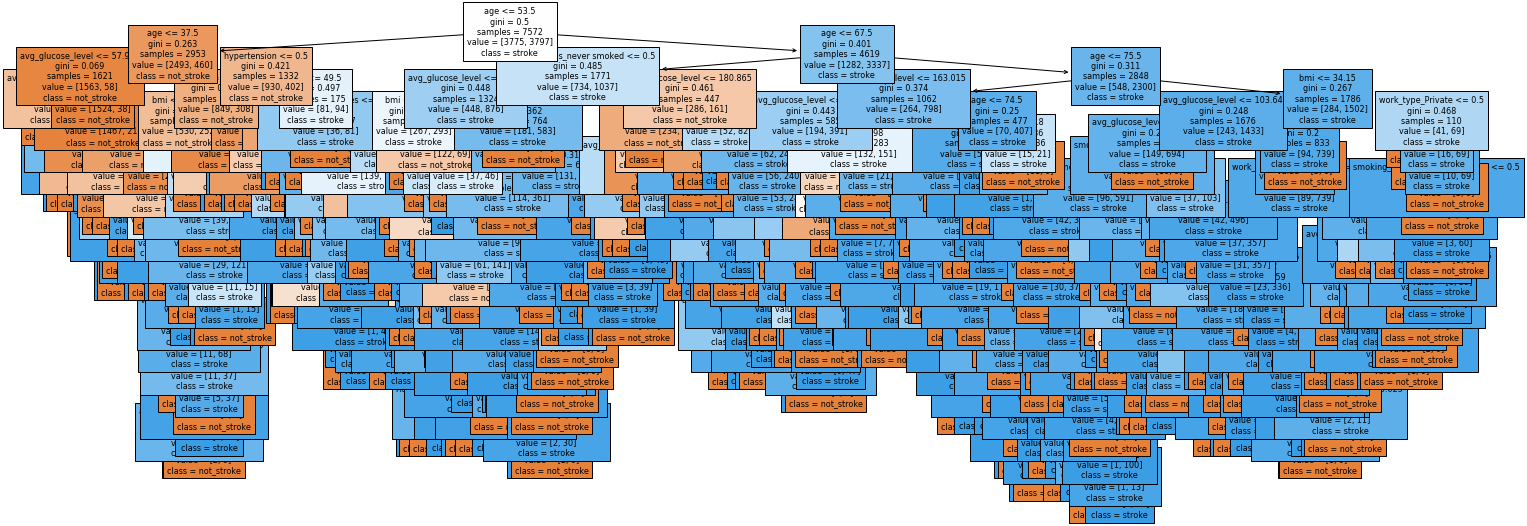

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,9))
_ = plot_tree(bestAccuracyTree, 
                feature_names=X1.columns,  
                class_names=['not_stroke','stroke'],
                filled=True,
                fontsize=8
             )

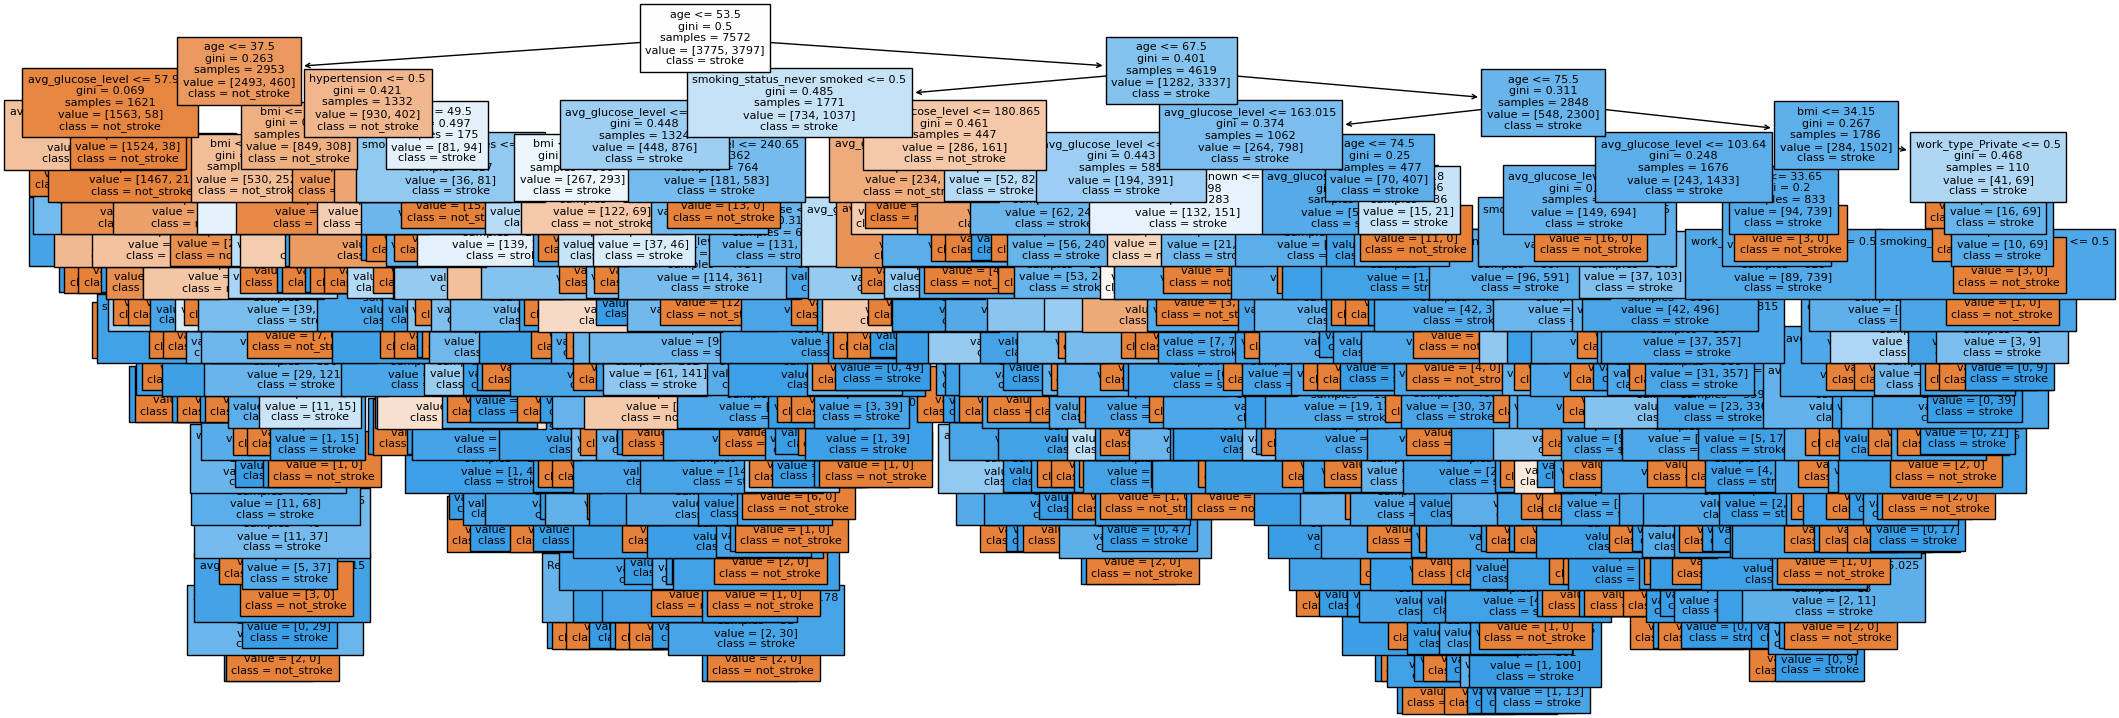

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,9) , dpi=100)
_ = plot_tree(bestRecallTree, 
                feature_names=X1.columns,  
                class_names=['not_stroke','stroke'],
                filled=True,
                fontsize=8
             )

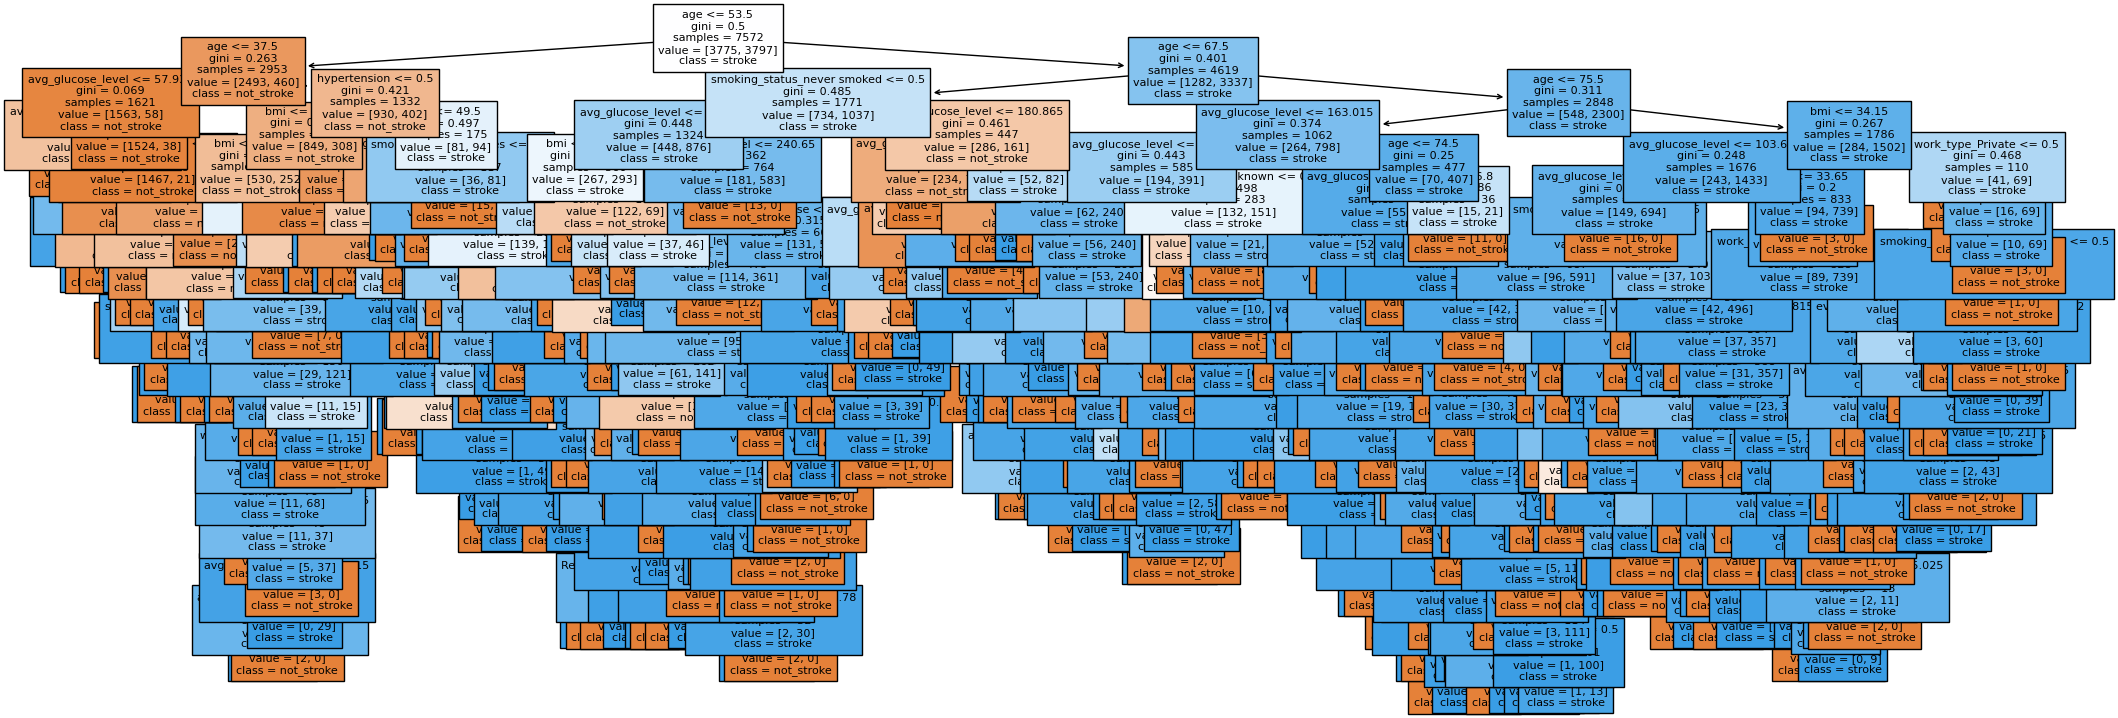

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,9),dpi=100)
_ = plot_tree(bestPrecisionTree, 
                feature_names=X1.columns,  
                class_names=['not_stroke','stroke'],
                filled=True,
                fontsize=8
             )

## Hyper Parameter Tuning for KNN-Model

In [30]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,49,2)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X1, train_y1)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyKnn = gridSearch.best_estimator_

accuracy score:  0.9705499768214345
parameters:  {'metric': 'euclidean', 'n_neighbors': 1}


In [31]:
score_measure = 'precision'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,49,2)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X1, train_y1)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionKnn = gridSearch.best_estimator_

precision score:  0.9445816863262382
parameters:  {'metric': 'euclidean', 'n_neighbors': 1}


In [32]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,49,2)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X1, train_y1)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionKnn = gridSearch.best_estimator_

recall score:  1.0
parameters:  {'metric': 'euclidean', 'n_neighbors': 1}


## Metrics Values of KNN model before performing hyper parameter tuning:
   Accuracy: 92.6
   Precision :86.9
   Recall: 1
## Metrics Values of KNN model after performing hyper parameter tuning:
     Accuracy: 97.05
     Precision :94.4
     Recall: 1

## Metrics Values of Decision Tree model before performing hyper parameter tuning
       Accuracy: 96.7
       Precision :93.8
       Recall: 1
 ## Metrics Values of Decision Tree model after performing hyper parameter tuning
         Accuracy: 97.08
         Precision :94.5
         Recall: 1

## By observing all the metrics before hyper parameter tuning it is very clear that Decision tree is the best model (with accuracy of 96.7 and precision of 93.8) when compared to KNN (with accuracy of 92.6 and precision of 86.9)

## By observing all the metrics after hyper parameter tuning, the metric values for both KNN and Decision tree are almost similar.(accuracy 97, precision 94.5) With minimal difference, we can say Decision Tree is the best model


## After observing the FP and FN, FN are higher than FP we can consider Precision is the best metric. Also Precision increased to 94.5 from 83 where rest of metrics doesn't have much difference